In [42]:
# The aim of this was to practice some model developement and evaluation concepts, from the IBM data analysis progam

In [142]:
# the libaries to be used were imported
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.metrics import mean_squared_error

In [44]:
# the source data was loaded into the dataframe df:

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


##  Exploratory Data Analysis

In [46]:
# Carried out a little data exploration on the dataset

print(f'Data contain {df.shape[0]} records and {df.shape[1]} columns.')

for col in df.columns:
    pct_missing = df[col].isnull().mean()
    print(f'{col} - {pct_missing :.3%}')

Data contain 201 records and 29 columns.
symboling - 0.000%
normalized-losses - 0.000%
make - 0.000%
aspiration - 0.000%
num-of-doors - 0.000%
body-style - 0.000%
drive-wheels - 0.000%
engine-location - 0.000%
wheel-base - 0.000%
length - 0.000%
width - 0.000%
height - 0.000%
curb-weight - 0.000%
engine-type - 0.000%
num-of-cylinders - 0.000%
engine-size - 0.000%
fuel-system - 0.000%
bore - 0.000%
stroke - 1.990%
compression-ratio - 0.000%
horsepower - 0.000%
peak-rpm - 0.000%
city-mpg - 0.000%
highway-mpg - 0.000%
price - 0.000%
city-L/100km - 0.000%
horsepower-binned - 0.498%
diesel - 0.000%
gas - 0.000%


In [48]:
# From the data exploration, we can see that the columns "stroke" and "horsepower-binned" contain null colums
# lets look at the data types of the columns
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [ ]:
# Stroke is float datatype, but horsepower-binned is object datatype

In [68]:
# lets see the data distrubution in the stroke column
df['stroke'].describe()


count    197.000000
mean       3.256904
std        0.319256
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

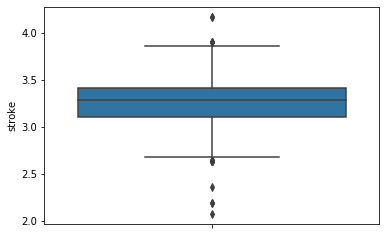

In [69]:
sns.boxplot(y="stroke", data=df)

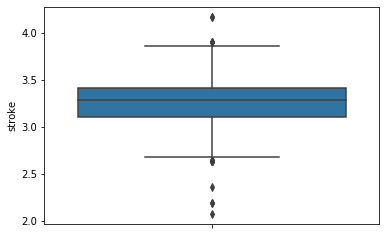

In [70]:
# We can observe that from the data dsitrubution we can use the mean to replace the missing values.
# Using .replace, the missing values are replaced with the mean and the data distrubution reviwed
mean=df['stroke'].mean()
df['stroke'].replace(np.nan,mean, inplace=True)
sns.boxplot(y="stroke", data=df)

count    201.000000
mean       3.256904
std        0.316048
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

In [74]:
# the stroke column looks satisfactory, lets take a look at the horsepower-binned column
df['horsepower-binned'].describe(include = all)

count     200
unique      3
top       Low
freq      115
Name: horsepower-binned, dtype: object

In [77]:
# Luckily, just one data is missing, from the description, from the description the most occuring entry is low, so we can replace that missing column with low
df['horsepower-binned'].replace(np.nan,'Low', inplace=True)

In [78]:
df['horsepower-binned'].describe(include = all)

count     201
unique      3
top       Low
freq      116
Name: horsepower-binned, dtype: object

In [79]:
# from th look of things we have handled the missing data, now we can move on to developing our models.
# for this practice, i will be trying a Linear Regression, Multiple Linear regression, Polynomial Regression.

### Linear Regression.

In [198]:
#Create a linear regression object

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [199]:
#For this example, we want to look at how city-mpg can help us predict car price. Using simple linear regression, 
#i created a linear function with "city-mpg" as the predictor variable and the "price" as the response variable.



In [200]:
X = df[['city-mpg']]
Y = df['price']

In [201]:
# fit the model using city-mpg
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

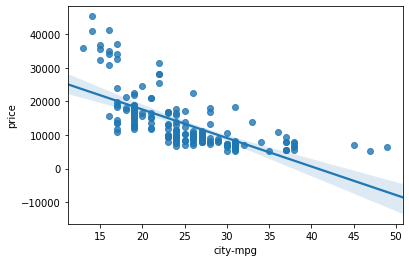

In [202]:
#lets visualise the model
sns.regplot(x = 'city-mpg', y = 'price', data = df)

We can see that from our regression model, there is a negative relationship between price and city-mpg, with increase in city-mpg, thers is a decrease in price

In [203]:
# i carried out a check on the correlation 
# lets see the correlation of city-mpg to price 
df[["city-mpg","price"]].corr()

,city-mpg,price
city-mpg,1.000000,-0.686571
price,-0.686571,1.000000


In [204]:
# to know the value of the intercept and slope

# to know the value of the intercept and slope

print ('the intercept is :', lm.intercept_ ," and the slopes are:" ,lm.coef_)

the intercept is : 34595.600842778265  and the slopes are: [-849.45322454]


In [205]:
# Lets use or model to do some prediction
Yhat=lm.predict(X)
Yhat[0:4]   

array([16757.08312743, 16757.08312743, 18455.98957651, 14208.72345381])

In [171]:
# to find the R^2 and mean_squared_error

mse = mean_squared_error(df['price'], Yhat)

print('The R-square of the model is: ', lm.score(X, Y), ' and the mean_squared_error is: ', mse)

The R-square of the model is:  0.4713797473570377  and the mean_squared_error is:  33219371.63106507


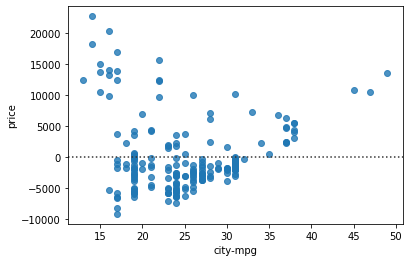

In [161]:
# A residual plot is plotted so see the variance in the data distrubution, 
sns.residplot(df['city-mpg'], df['price'])
plt.show()

While the correlation of the is 0.686571, the distrubution of the data are not randomly spread around the x-axis.
lets try another model and see if we can get a better distrubution

This is our simple linear regression model.

## Multiple Linear regression

We can use multiple predictor variables to best fit our model to the target, before developing this model, we will evaluate the columns with the best correlation to price and select them for this model.

In [176]:
df[["city-mpg","price", "num-of-doors", "horsepower", "peak-rpm", "highway-mpg", "curb-weight", 
    "stroke","num-of-cylinders","normalized-losses", "engine-size"]].corr()

,city-mpg,price,horsepower,peak-rpm,highway-mpg,curb-weight,stroke,normalized-losses,engine-size
city-mpg,1.000000,-0.686571,-0.822214,-0.115413,0.972044,-0.749543,-0.034079,-0.225016,-0.650546
price,-0.686571,1.000000,0.809575,-0.101616,-0.704692,0.834415,0.082267,0.133999,0.872335
horsepower,-0.822214,0.809575,1.000000,0.107885,-0.804575,0.757976,0.098282,0.217299,0.822676
peak-rpm,-0.115413,-0.101616,0.107885,1.000000,-0.058598,-0.279361,-0.063388,0.239543,-0.256733
highway-mpg,0.972044,-0.704692,-0.804575,-0.058598,1.000000,-0.794889,-0.034741,-0.181877,-0.679571
curb-weight,-0.749543,0.834415,0.757976,-0.279361,-0.794889,1.000000,0.167412,0.099404,0.849072
stroke,-0.034079,0.082267,0.098282,-0.063388,-0.034741,0.167412,1.000000,0.055127,0.205806
normalized-losses,-0.225016,0.133999,0.217299,0.239543,-0.181877,0.099404,0.055127,1.000000,0.112360
engine-size,-0.650546,0.872335,0.822676,-0.256733,-0.679571,0.849072,0.205806,0.112360,1.000000


From the above table we can see that curb-weight, horsepower, engine-size, highway-mpg and city-mpg have better correlation,
so we select those varibles to use for our model.

In [177]:
# Create the linear regression model 
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
# the predictor values we will be using are 
A = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'city-mpg']]
B = df['price']

In [184]:
# fit the model using city-mpg
lm1.fit(A, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
Y_hat = lm1.predict(A)

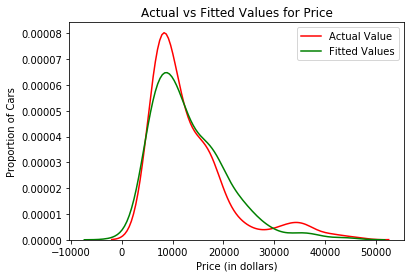

In [186]:
# lets visualize the model of the MLR using the distrubution plot
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="g", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [196]:
# to know the value of the intercept and slope

print ('the intercept is :', lm1.intercept_ ," and the slopes are:" ,lm1.coef_)

the intercept is : -15878.859689022007  and the slopes are: [ 50.72462478   4.75456446  82.69927682 103.45226331 -78.53403943]


In [207]:
Y_hat = lm1.predict(A)
Y_hat[0:4]

array([13761.10618437, 13761.10618437, 19122.77018324, 10639.44131783])

In [208]:
mse = mean_squared_error(df['price'], Y_hat)

print('The R-square of the model is: ', lm1.score(A, B), ' and the mean_squared_error is: ', mse)

The R-square of the model is:  0.8095368507203463  and the mean_squared_error is:  11969019.549119001


## Polynomial Regression

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.
There are different orders of polynomial regression:

In [209]:
# We

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [211]:
M = df['city-mpg']
N = df['price']

In [213]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(M, N, 3)
p = np.poly1d(f)
print(p)

        3       2
-2.668 x + 287 x - 1.02e+04 x + 1.275e+05


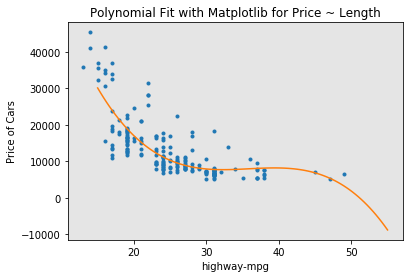

In [214]:
PlotPolly(p, M, N, 'highway-mpg')

In [216]:
np.polyfit(M, N, 4)

array([ 1.66044037e-01, -2.26755921e+01,  1.14911385e+03, -2.59275830e+04,
        2.29986642e+05])

In [217]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [218]:
Z_pr=pr.fit_transform(Z)

In [219]:
Z.shape

(201, 4)

In [220]:
Z_pr.shape

(201, 15)

In [221]:
from sklearn.metrics import r2_score

In [ ]:
#Let’s import the function r2_score from the module metrics as we are using a different function.

In [226]:
#Using the function r2_score we can get the R^2 value from the metrics
r_squared = r2_score(N, p(M))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6585166247486773


In [232]:
print ('the mean squared value is: ', (mean_squared_error(df['price'], p(M))))



the mean squared value is:  21459380.51292549


## MODEL COMPARISON AND EVALUATION

I used the R^2 and MSE to evealuate the best model for this dataset, lets compare for the various models built

For the Simple Linear regression, the R-square of the model is:  0.4713797473570377  and the mean_squared_error is: 
33219371.63106507.

For the Multiple Linear regression, The R-square of the model is:  0.8095368507203463  and the mean_squared_error is:  11969019.549119001.

For the Polynomial Regression model, The R-square value is:  0.6585166247486773 and the mean squared value is:  21459380.51292549